In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

sns.set_theme(color_codes=True)

df = pd.read_csv('../data/Final_House_Data.csv')
df.head()

,Unnamed: 0,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot
0,0,1.0,3,1.0,7,221900.0,1180,0.0,1180,5650
1,2,1.0,2,1.0,6,180000.0,770,0.0,770,10000
2,3,3.0,4,1.0,7,604000.0,1050,910.0,1960,5000
3,4,2.0,3,1.0,8,510000.0,1680,0.0,1680,8080
4,5,4.5,4,1.0,11,1230000.0,3890,1530.0,5420,101930


In [2]:
df = df.drop('Unnamed: 0', axis = 1)

In [3]:
# Initialising the train and test split for model regression values
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.33, random_state=42)

In [4]:
train

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot
6066,3.50,4,2.0,8,722500.0,1820,780.0,2600,5100
5838,1.75,3,1.0,7,300000.0,1240,570.0,1810,21138
2245,2.00,5,1.0,7,719000.0,1560,1550.0,3110,6131
1484,3.00,3,1.0,8,610000.0,1620,860.0,2480,45302
6088,1.00,3,1.0,7,165000.0,980,400.0,1380,7334
...,...,...,...,...,...,...,...,...,...
11284,1.00,1,1.0,7,525000.0,830,0.0,830,3200
11964,1.00,2,1.0,5,265000.0,910,0.0,910,4600
5390,1.50,3,1.0,7,259950.0,1350,0.0,1350,7827
860,1.00,3,1.0,6,435000.0,700,700.0,1400,4800


In [5]:
test

,bathrooms,bedrooms,floors,grade,price,sqft_above,sqft_basement,sqft_living,sqft_lot
1272,2.25,4,2.0,8,435000.0,2730,0.0,2730,7506
3425,1.75,4,1.0,7,512500.0,1540,0.0,1540,8311
6417,1.75,3,1.0,6,235000.0,950,950.0,1900,8540
4328,2.50,5,2.0,8,1200000.0,2160,700.0,2860,4000
8937,1.00,2,1.0,7,425000.0,1020,300.0,1320,8830
...,...,...,...,...,...,...,...,...,...
9527,1.00,3,1.0,7,365000.0,1120,0.0,1120,8443
19138,3.00,5,1.0,7,347500.0,1330,900.0,2230,6551
4785,2.50,3,2.0,8,479990.0,1390,620.0,2010,2386
9812,1.75,4,1.5,7,536500.0,1450,550.0,2000,4000


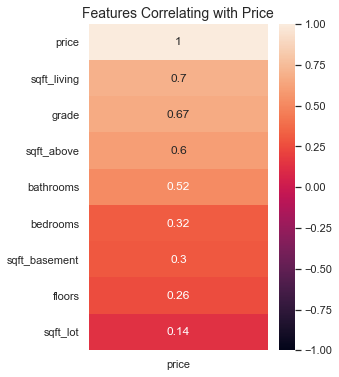

In [6]:
display.Image('../Images/Price_corr.png')

In [7]:
# Based on the above, the simple base model will use the top three independent variables
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
X_train = train[['sqft_living', 'grade', 'sqft_above']]
y_train = train['price']

linreg.fit(X_train, y_train)

LinearRegression()

In [8]:
X_test = test[['sqft_living', 'grade', 'sqft_above']]
y_test = test['price']

In [9]:
X_train.describe()

,sqft_living,grade,sqft_above
count,13748.000000,13748.000000,13748.000000
mean,2057.219450,7.648312,1771.430172
std,888.093426,1.159957,806.291446
min,370.000000,4.000000,370.000000
25%,1420.000000,7.000000,1190.000000
50%,1900.000000,7.000000,1551.000000
75%,2520.000000,8.000000,2190.000000
max,9890.000000,13.000000,8860.000000


`sqft_living` and `sqft_above` have very similar values.

In [10]:
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [11]:
# Defining a function to run in order to get the RMSE scores over again
from sklearn.metrics import mean_squared_error

def get_rmse(y_tn, y_tt, y_tnp, y_ttp):
    import math
    MSE_train = mean_squared_error(y_tn, y_tnp,)
    MSE_test = mean_squared_error(y_tt, y_ttp)
    
    RMSE_train = math.sqrt(MSE_train)
    RMSE_test = math.sqrt(MSE_test)
    print(f'Train RMSE: {RMSE_train:.3e}, Test RMSE: {RMSE_test:.3e}')
    return

In [12]:
get_rmse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 2.397e+05, Test RMSE: 2.376e+05


Huge value so far, most likely due to ony having a few variables for the model to train off.

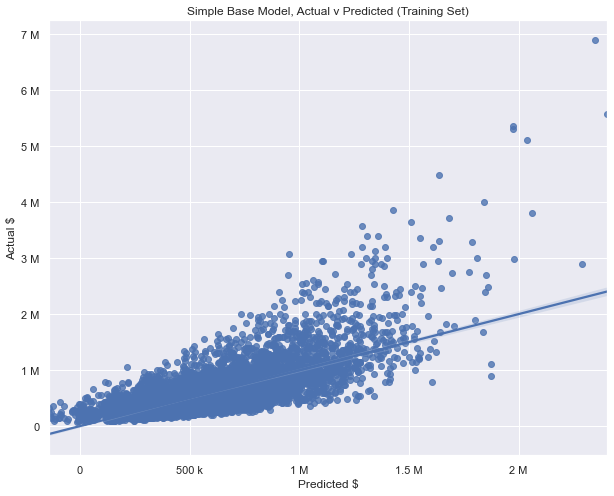

In [13]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_train_pred, y = y_train)

plt.title('Simple Base Model, Actual v Predicted (Training Set)')
plt.xlabel('Predicted $'), plt.ylabel('Actual $')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.savefig('../Images/Base_Model.png', bbox_inches='tight');

At least shows somewhat positive correlation between predicted and actual `price` values.

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

# Defining another function to make qq-plots
def model_qq(formula, data):
    model = ols(formula, data).fit()
    residuals = model.resid
    qq_plot = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);
    return qq_plot

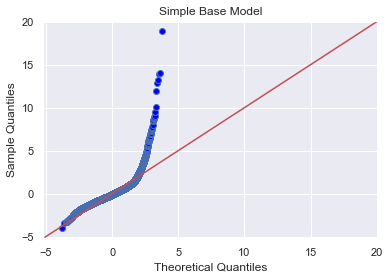

In [15]:
train_simp = X_train.join(y_train)
formula = 'price ~ sqft_living + grade + sqft_above'
model_qq(formula, train_simp)
plt.title('Simple Base Model')
plt.savefig('../Images/Base_qqplot.png', bbox_inches='tight');

Incredibly skewed, distributions will need to be looked at.

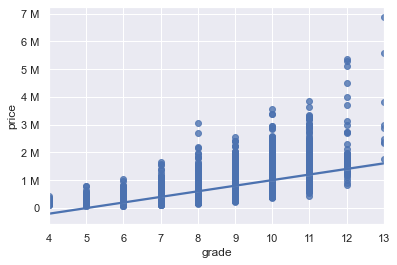

In [16]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots()

sns.regplot(x = train['grade'], y = train['price'])
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.savefig('../Images/Grade_Catergorical.png', bbox_inches='tight');

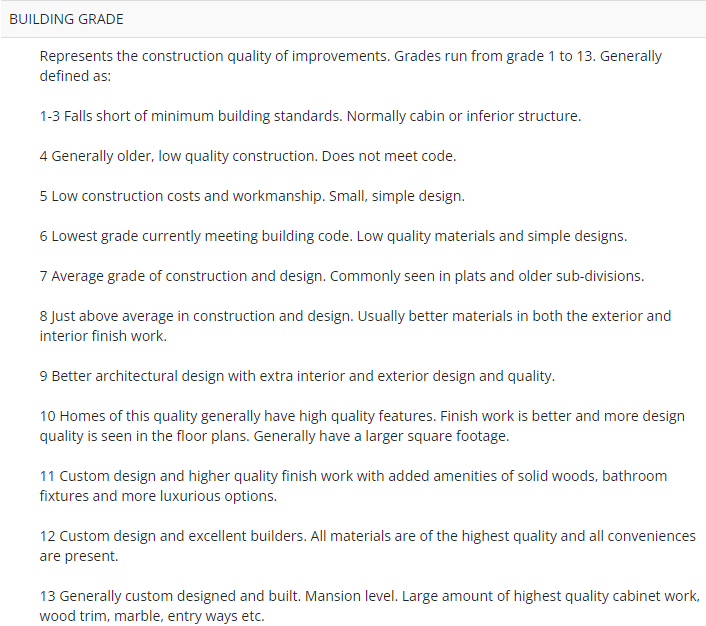

In [17]:
# Above graph shows characteristics of being categorical, 
# Found the description of these categories on the King County Website, showing it is Linear
display.Image('../Images/kc_building_grades.png')

As shown by the model summary and the qq-plot, the Skew and Kurtosis are quite high.
For the next iteration the dependent variable price will be transformed to manage with this high skew and kurtosis.

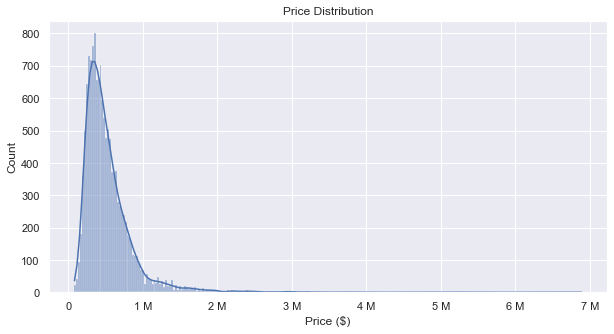

In [18]:
fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(train['price'], kde=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.title('Price Distribution'), plt.xlabel('Price ($)')
plt.savefig('../Images/Price_Distribution.png', bbox_inches='tight');

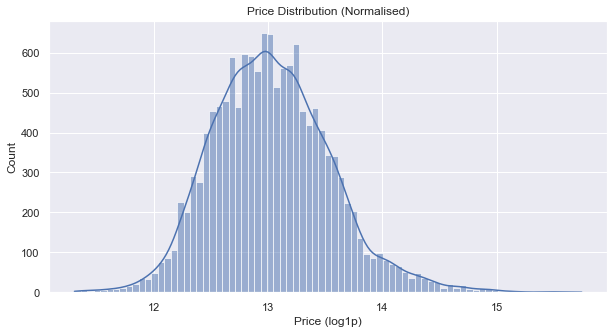

In [19]:
# `price` distribution heavily skewed, checking if log1p transformation will normalise the variable
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(np.log(train['price']), kde=True)
plt.title('Price Distribution (Normalised)'), plt.xlabel('Price (log1p)')
plt.savefig('../Images/Price_Dist_Normal.png', bbox_inches='tight');

In [20]:
train['price'] = np.log1p(train['price'])
test['price'] = np.log1p(test['price'])

<ipython-input-20-a84dbcb1a8f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['price'] = np.log1p(train['price'])
<ipython-input-20-a84dbcb1a8f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['price'] = np.log1p(test['price'])


In [21]:
linreg = LinearRegression()
X_train = train[['sqft_living', 'grade', 'sqft_above']]
y_train = train['price']

X_test = test[['sqft_living', 'grade', 'sqft_above']]
y_test = test['price']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [22]:
get_rmse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.454e-01, Test RMSE: 3.455e-01


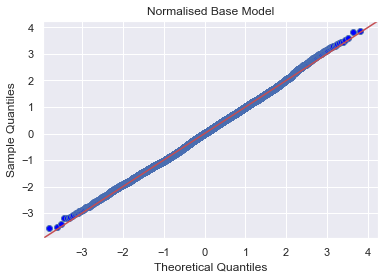

In [24]:
# Providing ols model with info that the `grade` variable is categorical, and with the normalised `price`
train_simp = X_train.join(y_train)
formula = 'price ~ sqft_living + C(grade) + sqft_above'
model_qq(formula, train_simp)
plt.title('Normalised Base Model')
plt.savefig('../Images/Norm_qqplot.png', bbox_inches='tight');

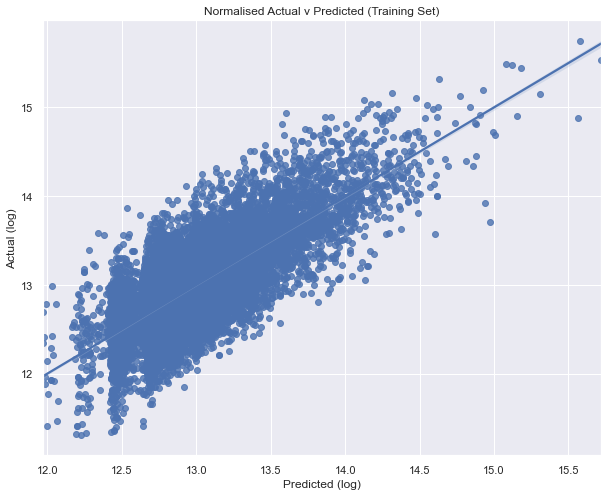

In [25]:
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_train_pred, y = y_train)

plt.title('Normalised Actual v Predicted (Training Set)')
plt.xlabel('Predicted (log)'), plt.ylabel('Actual (log)')
plt.savefig('../Images/Price_Transformed_Model.png', bbox_inches='tight');

Wonderful, the RMSE value has decreased dramatically, and the qq-plot and model looks much more normally distributed.  
Now let's build upon this second model and add the other features.

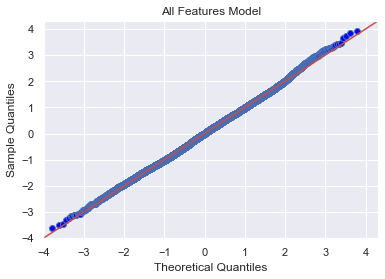

In [26]:
formula = 'price ~ C(grade) + bathrooms + bedrooms + floors + sqft_above + sqft_basement + sqft_living + sqft_lot'
model_qq(formula, train)
plt.title('All Features Model')
plt.savefig('../Images/All_Features_qqplot.png', bbox_inches='tight');

In [27]:
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [29]:
get_rmse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.437e-01, Test RMSE: 3.444e-01


Not much change for this iteration, time to check the distributions of the independent variables and also check for Multicollinearity.

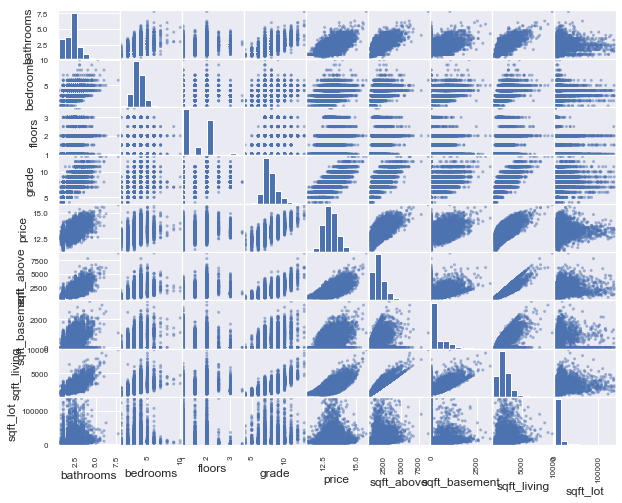

In [30]:
pd.plotting.scatter_matrix(train, figsize=(10, 8))
plt.savefig('../Images/Feature_Matrix.png', bbox_inches='tight');

`bedrooms` and `floors` are also categorical.  
`sqft_living` and `sqft_above` indeed show high correlation.

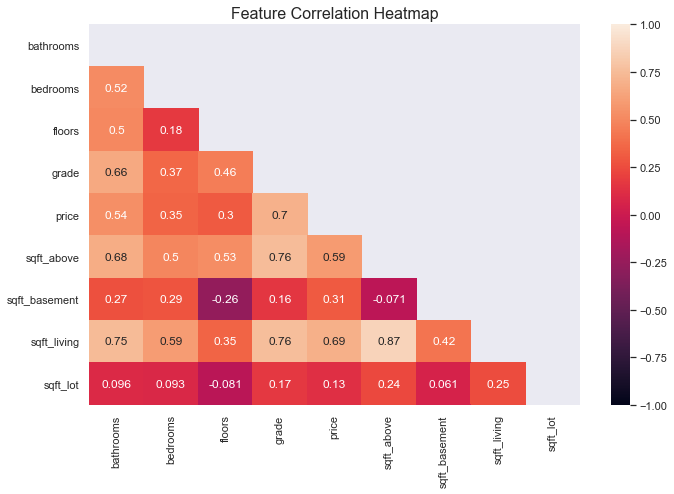

In [31]:
plt.figure(figsize=(11, 7))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Feature Correlation Heatmap', fontsize=16)
plt.savefig('../Images/Feature_corr.png', bbox_inches='tight');

For values over 0.8 correlation, it is necessary to drop one of the pair. Because `sqft_living` has a higher correlation to price than `sqft_above`, the latter was dropped, and then`sqft_basement` was set to Boolean values, as it's area was included within `sqft_living`.

In [32]:
train = train.drop('sqft_above', axis=1)

In [33]:
train[train['sqft_basement'] > 0]

,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_living,sqft_lot
6066,3.50,4,2.0,8,13.490474,780.0,2600,5100
5838,1.75,3,1.0,7,12.611541,570.0,1810,21138
2245,2.00,5,1.0,7,13.485618,1550.0,3110,6131
1484,3.00,3,1.0,8,13.321216,860.0,2480,45302
6088,1.00,3,1.0,7,12.013707,400.0,1380,7334
...,...,...,...,...,...,...,...,...
6420,2.00,3,1.0,8,13.197473,850.0,2070,9195
5051,2.25,4,1.0,7,12.916571,1100.0,2810,23400
5311,1.75,3,1.0,8,12.983104,400.0,2030,13700
2433,1.50,2,1.0,8,13.180634,300.0,1580,3680


In [34]:
train.loc[train['sqft_basement'] > 0, 'sqft_basement'] = 1
train['sqft_basement'] = train['sqft_basement'].astype(bool)

In [35]:
test = test.drop('sqft_above', axis=1)
test.loc[test['sqft_basement'] > 0, 'sqft_basement'] = 1
test['sqft_basement'] = test['sqft_basement'].astype(bool)

In [36]:
X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [38]:
get_rmse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.419e-01, Test RMSE: 3.427e-01


It is evident in the same scatter matrix plot that several of the above columns seem to be, inlcuding 'bedrooms' and 'floors'.  
However, this data will not be one-hot encoded, as these columns contain ordinal data, meaning they can still be used as linear regression, as they are simply a count of the variables. Instead, the features will just be wrapped with C( ) within the model formula to let it know that they are still categorical.

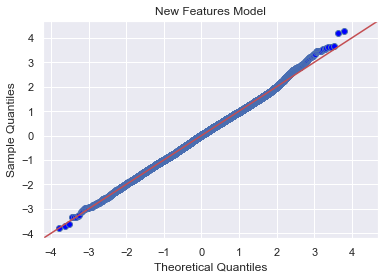

In [39]:
formula = 'price ~ C(grade) + sqft_living + bathrooms + C(bedrooms) + C(sqft_basement) + C(floors) + sqft_lot'
model_qq(formula, train)
plt.title('New Features Model')
plt.savefig('../Images/All_Features_qqplot.png', bbox_inches='tight');

Again, very slight changes for this iteration.

For Iteration 4, the distributions of the features will be looked at to manage the slight lifting the model is showing at it's top tail.

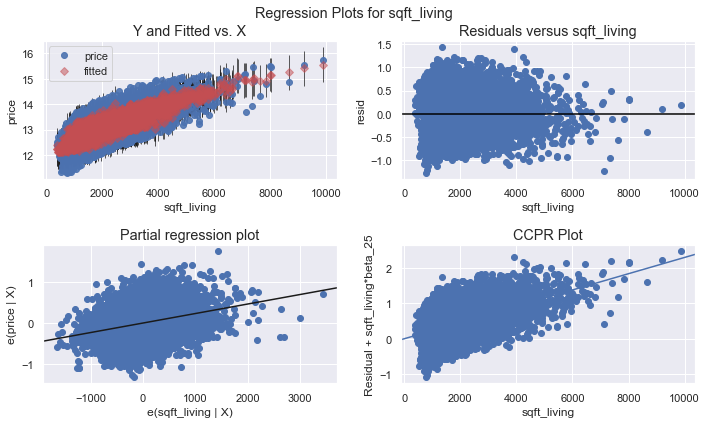

In [40]:
# Checking for homoscedasticity, using `sqft_living` as an example
import statsmodels.api as sm
model = ols(formula, train).fit()
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.savefig('../Images/Sqft_living_Regression.png', bbox_inches='tight');

In [41]:
# Definitely showing characteristics of being heteroscedastic
# Defining a function to log1p transform these two columns
def transform(log_cols, data):
    for cols in log_cols:
        data[cols] = np.log1p(data[cols])
        print(cols, 'has been log1p transformed')
    return data.head()

In [42]:
log_cols = ['sqft_living', 'sqft_lot']
transform(log_cols, train)

sqft_living has been log1p transformed
sqft_lot has been log1p transformed


,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_living,sqft_lot
6066,3.50,4,2.0,8,13.490474,True,7.863651,8.537192
5838,1.75,3,1.0,7,12.611541,True,7.501634,9.958875
2245,2.00,5,1.0,7,13.485618,True,8.042699,8.721276
1484,3.00,3,1.0,8,13.321216,True,7.816417,10.721129
6088,1.00,3,1.0,7,12.013707,True,7.230563,8.900413


In [43]:
formula = 'price ~ C(grade) + sqft_living + bathrooms + C(bedrooms) + C(sqft_basement) + C(floors) + sqft_lot'
model = ols(formula, train).fit()

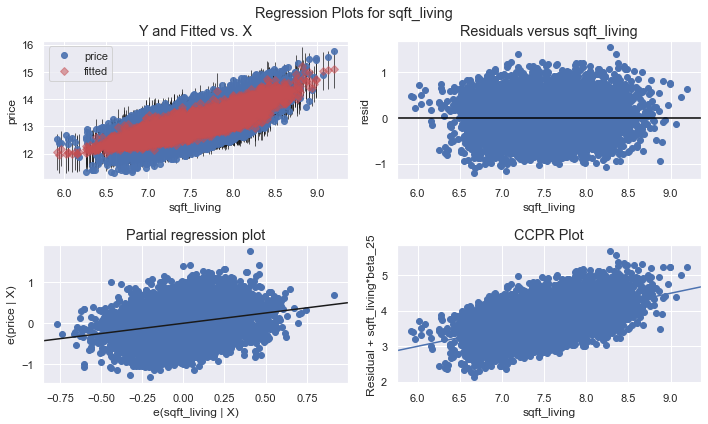

In [44]:
# Ensuring that this normalisation has worked
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
plt.savefig('../Images/Sqft_living_Normal_Reg.png', bbox_inches='tight');

In [45]:
transform(log_cols, test)

sqft_living has been log1p transformed
sqft_lot has been log1p transformed


,bathrooms,bedrooms,floors,grade,price,sqft_basement,sqft_living,sqft_lot
1272,2.25,4,2.0,8,12.983104,False,7.912423,8.923591
3425,1.75,4,1.0,7,13.147058,False,7.340187,9.025456
6417,1.75,3,1.0,6,12.367345,True,7.550135,9.052633
4328,2.50,5,2.0,8,13.997833,True,7.958926,8.294300
8937,1.00,2,1.0,7,12.959847,True,7.186144,9.086024


Now for the final regression model.

In [46]:
X_train = train.drop('price', axis=1)
y_train = train['price']

linreg.fit(X_train, y_train)

LinearRegression()

In [47]:
X_test = test.drop('price', axis=1)
y_test = test['price']

y_train_preds = linreg.predict(X_train)
y_test_preds = linreg.predict(X_test)

In [49]:
get_rmse(y_train, y_test, y_train_pred, y_test_pred)

Train RMSE: 3.419e-01, Test RMSE: 3.427e-01


In [50]:
# Getting the top three independent variables that are correlated with `price`
from sklearn.feature_selection import RFE

selector = RFE(linreg, n_features_to_select=3)
selector = selector.fit(X_train, y_train.values)

selector.support_

array([False, False, False,  True,  True,  True, False])

In [51]:
selected_columns = X_train.columns[selector.support_]
linreg.fit(X_train[selected_columns], y_train)
print(selected_columns)

Index(['grade', 'sqft_basement', 'sqft_living'], dtype='object')


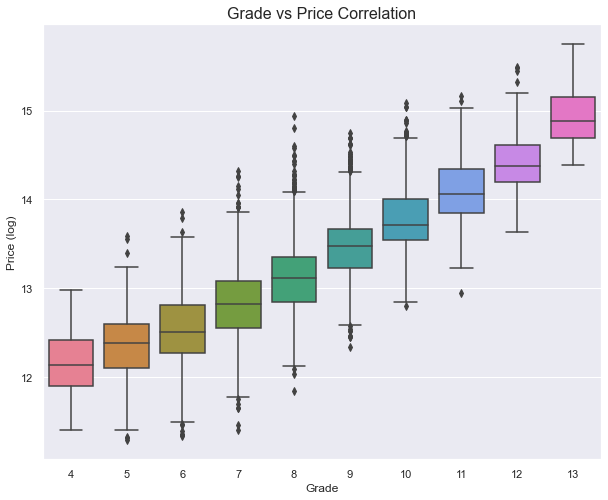

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x = train['grade'],y = train['price'], palette = "husl")
plt.title('Grade vs Price Correlation', fontsize=16), plt.ylabel('Price (log)'), plt.xlabel('Grade')
plt.savefig('../Images/Grade_v_Price_Correlation.png', bbox_inches='tight');

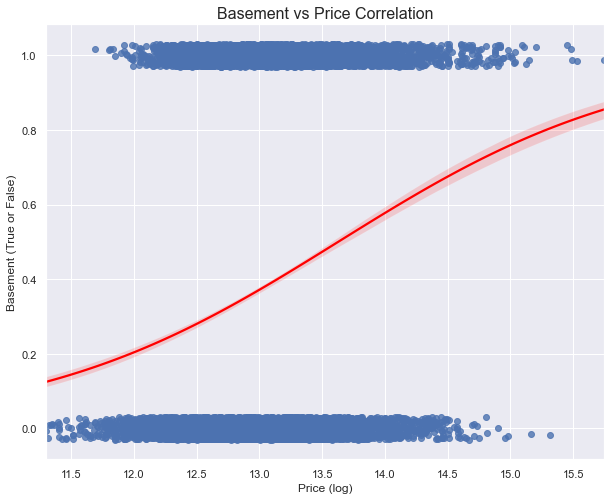

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x = train['price'], y = train['sqft_basement'], logistic=True, y_jitter=.03, line_kws={"color": "red"})
plt.title('Basement vs Price Correlation', fontsize=16), plt.xlabel('Price (log)'), plt.ylabel('Basement (True or False)')
plt.savefig('../Images/Basement_v_Price_Correlation.png', bbox_inches='tight');

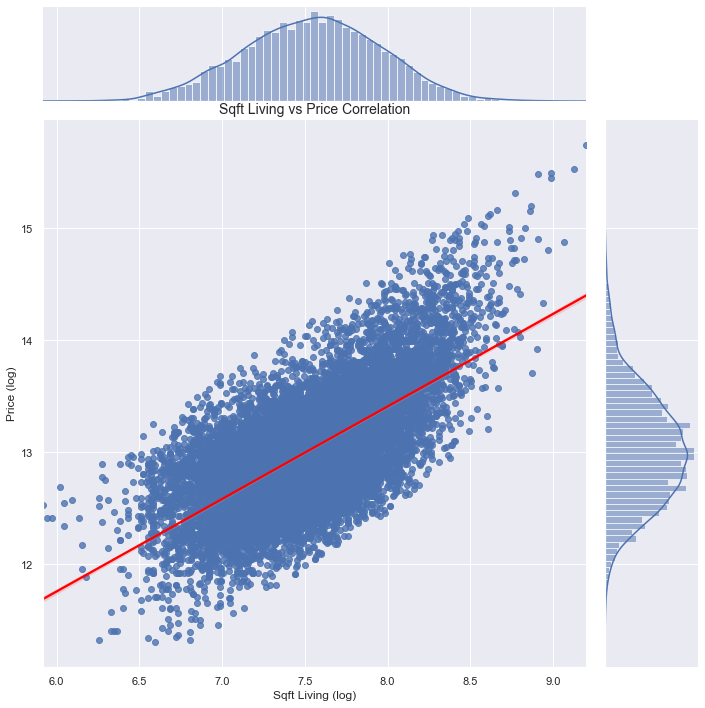

In [54]:
sns.jointplot(x = train['sqft_living'], y = train['price'], kind='reg', height=10, line_kws={"color": "red"})
plt.title('Sqft Living vs Price Correlation', fontsize=14), plt.ylabel('Price (log)'), plt.xlabel('Sqft Living (log)')
plt.savefig('../Images/SqftLiving_v_Price_Correlation.png', bbox_inches='tight');

In [55]:
# Getting the exponential of the log transformed columns in order to find their coefficients
train['sqft_living'] = np.exp(train['sqft_living'])
train['price'] = np.exp(train['price'])

In [56]:
X_train = train[['grade', 'sqft_basement', 'sqft_living']]
y_train = train['price']

linreg.fit(X_train, y_train)

LinearRegression()

In [57]:
linreg.coef_

array([103955.48091489,  61469.86323725,    165.50741457])

Approximately for every grade level attained, the house price will increase by roughly \\$ 104,000  
Approximately if the house has a basement, the house price will increase by roughly \\$ 61,500  
Approximately for every 1 sqft of living space added, the house price will increase by \\$ 165